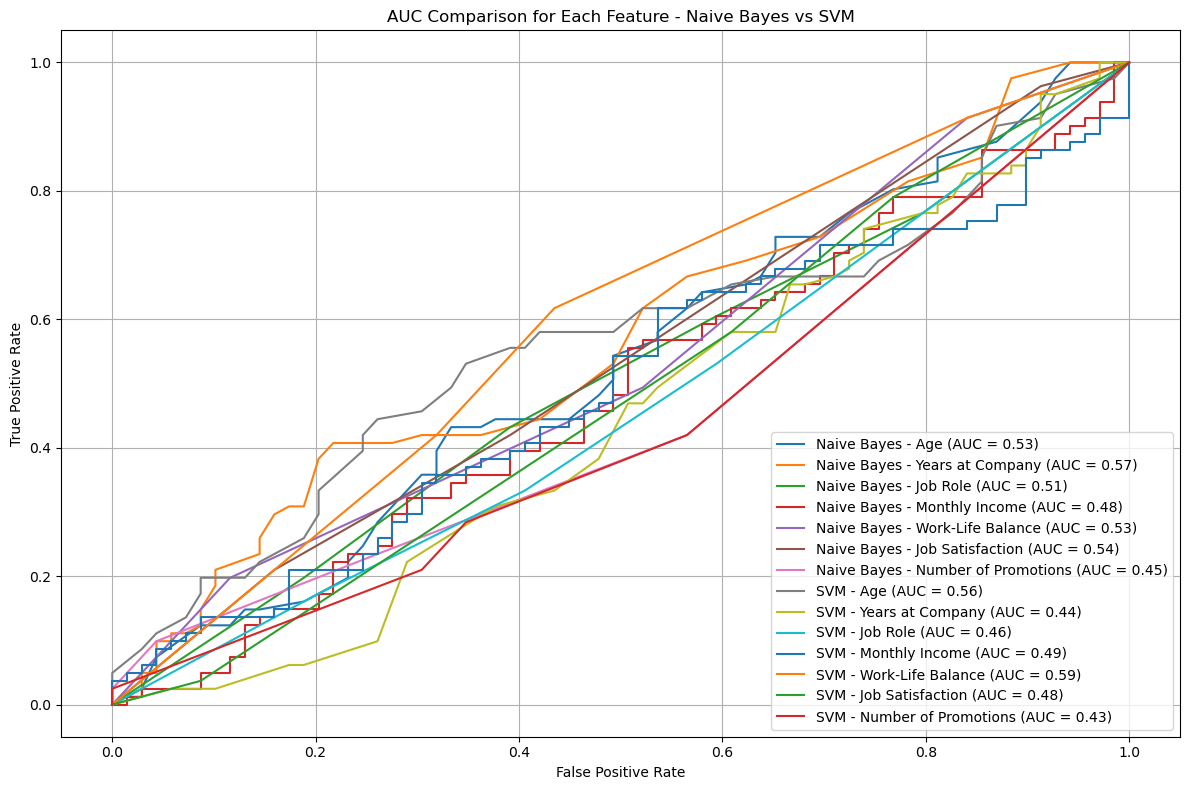

Naive Bayes AUC Values:
Age: 0.53
Years at Company: 0.57
Job Role: 0.51
Monthly Income: 0.48
Work-Life Balance: 0.53
Job Satisfaction: 0.54
Number of Promotions: 0.45

SVM AUC Values:
Age: 0.56
Years at Company: 0.44
Job Role: 0.46
Monthly Income: 0.49
Work-Life Balance: 0.59
Job Satisfaction: 0.48
Number of Promotions: 0.43


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/Users/jawadzaarif7/Desktop/38157/500 rows final.csv')

# Convert categorical features to numerical using LabelEncoder
label_encoders = {}
for column in ['Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Attrition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop(columns=['Employee ID', 'Attrition'])
y = data['Attrition']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize dictionaries to store AUC values
auc_values_nb = {}
auc_values_svm = {}

# --- Naive Bayes AUC Calculation ---
naive_bayes = GaussianNB()
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    # Use only one feature at a time for model training
    X_train_feature = X_train[:, i].reshape(-1, 1)
    X_test_feature = X_test[:, i].reshape(-1, 1)

    # Train and predict with Naive Bayes
    naive_bayes.fit(X_train_feature, y_train)
    y_prob_nb = naive_bayes.predict_proba(X_test_feature)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
    roc_auc = auc(fpr, tpr)
    auc_values_nb[feature] = roc_auc
    plt.plot(fpr, tpr, label=f'Naive Bayes - {feature} (AUC = {roc_auc:.2f})')

# --- SVM AUC Calculation ---
svm_model = SVC(probability=True, random_state=42)
for i, feature in enumerate(X.columns):
    # Use only one feature at a time for model training
    X_train_feature = X_train[:, i].reshape(-1, 1)
    X_test_feature = X_test[:, i].reshape(-1, 1)

    # Train and predict with SVM
    svm_model.fit(X_train_feature, y_train)
    y_prob_svm = svm_model.predict_proba(X_test_feature)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
    roc_auc = auc(fpr, tpr)
    auc_values_svm[feature] = roc_auc
    plt.plot(fpr, tpr, label=f'SVM - {feature} (AUC = {roc_auc:.2f})')

# Final Plot Adjustments
plt.title('AUC Comparison for Each Feature - Naive Bayes vs SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the AUC values for reference
print("Naive Bayes AUC Values:")
for feature, auc_value in auc_values_nb.items():
    print(f"{feature}: {auc_value:.2f}")

print("\nSVM AUC Values:")
for feature, auc_value in auc_values_svm.items():
    print(f"{feature}: {auc_value:.2f}")


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os

# Load dataset
data = pd.read_csv('/Users/jawadzaarif7/Desktop/38157/500 rows final.csv')

# Convert categorical features to numerical using LabelEncoder
label_encoders = {}
for column in ['Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Attrition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop(columns=['Employee ID', 'Attrition'])
y = data['Attrition']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize dictionaries to store AUC values
auc_values_nb = {}
auc_values_svm = {}

# --- Naive Bayes AUC Calculation ---
naive_bayes = GaussianNB()
for i, feature in enumerate(X.columns):
    # Use only one feature at a time for model training
    X_train_feature = X_train[:, i].reshape(-1, 1)
    X_test_feature = X_test[:, i].reshape(-1, 1)

    # Train and predict with Naive Bayes
    naive_bayes.fit(X_train_feature, y_train)
    y_prob_nb = naive_bayes.predict_proba(X_test_feature)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
    roc_auc = auc(fpr, tpr)
    auc_values_nb[feature] = roc_auc

# --- SVM AUC Calculation ---
svm_model = SVC(probability=True, random_state=42)
for i, feature in enumerate(X.columns):
    # Use only one feature at a time for model training
    X_train_feature = X_train[:, i].reshape(-1, 1)
    X_test_feature = X_test[:, i].reshape(-1, 1)

    # Train and predict with SVM
    svm_model.fit(X_train_feature, y_train)
    y_prob_svm = svm_model.predict_proba(X_test_feature)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
    roc_auc = auc(fpr, tpr)
    auc_values_svm[feature] = roc_auc

# Create a DataFrame to save the AUC values
auc_df = pd.DataFrame({
    'Feature': X.columns,
    'Naive Bayes AUC': [auc_values_nb[feature] for feature in X.columns],
    'SVM AUC': [auc_values_svm[feature] for feature in X.columns]
})

# Save the AUC values to an Excel file in the current working directory
output_file = os.path.join(os.getcwd(), 'AUC_Comparison.xlsx')
auc_df.to_excel(output_file, index=False)

print(f"AUC values saved to {output_file}")


AUC values saved to /Users/jawadzaarif7/Desktop/38157/Classification Results/AUC_Comparison.xlsx


Naive Bayes Confusion Matrix for Work-Life Balance:
[[ 0 69]
 [ 0 81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.54      1.00      0.70        81

    accuracy                           0.54       150
   macro avg       0.27      0.50      0.35       150
weighted avg       0.29      0.54      0.38       150



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


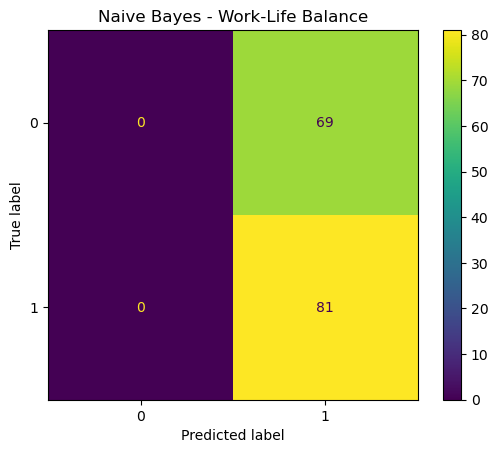

Naive Bayes Confusion Matrix for Age:
[[ 0 69]
 [ 0 81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.54      1.00      0.70        81

    accuracy                           0.54       150
   macro avg       0.27      0.50      0.35       150
weighted avg       0.29      0.54      0.38       150



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


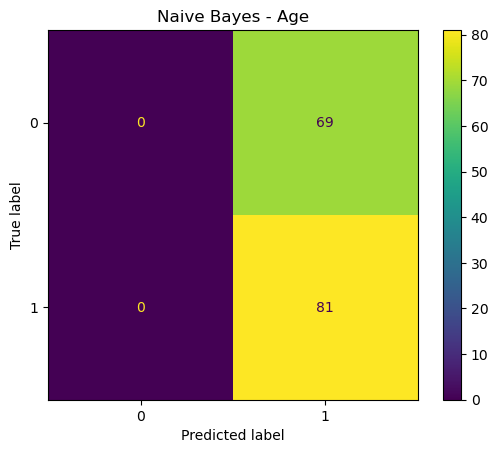

SVM Confusion Matrix for Work-Life Balance:
[[39 30]
 [31 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.57      0.56        69
           1       0.62      0.62      0.62        81

    accuracy                           0.59       150
   macro avg       0.59      0.59      0.59       150
weighted avg       0.59      0.59      0.59       150



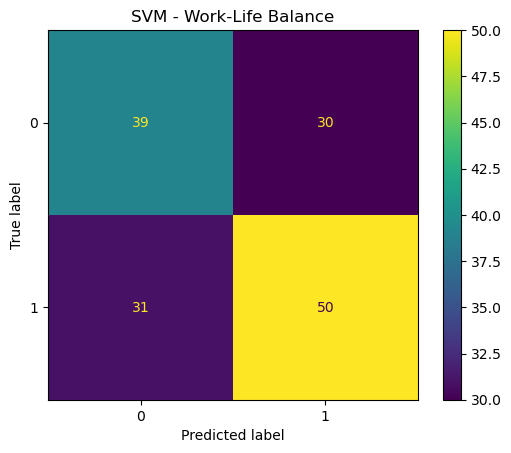

SVM Confusion Matrix for Age:
[[ 0 69]
 [ 0 81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.54      1.00      0.70        81

    accuracy                           0.54       150
   macro avg       0.27      0.50      0.35       150
weighted avg       0.29      0.54      0.38       150



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


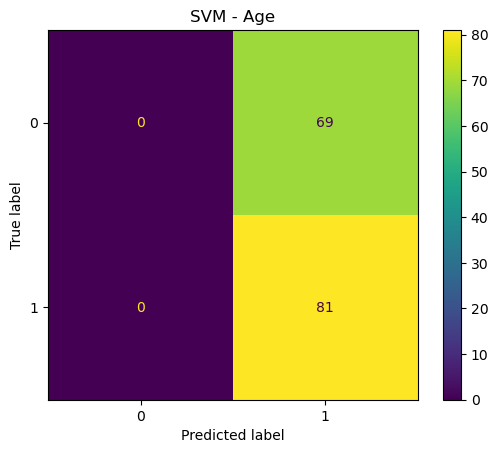

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/Users/jawadzaarif7/Desktop/38157/500 rows final.csv')

# Convert categorical features to numerical using LabelEncoder
label_encoders = {}
for column in ['Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Attrition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop(columns=['Employee ID', 'Attrition'])
y = data['Attrition']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- Naive Bayes Confusion Matrix for Work-Life Balance ---
nb = GaussianNB()
X_train_wlb = X_train[:, X.columns.get_loc('Work-Life Balance')].reshape(-1, 1)
X_test_wlb = X_test[:, X.columns.get_loc('Work-Life Balance')].reshape(-1, 1)
nb.fit(X_train_wlb, y_train)
y_pred_nb_wlb = nb.predict(X_test_wlb)

# Generate confusion matrix and classification report
cm_nb_wlb = confusion_matrix(y_test, y_pred_nb_wlb)
print("Naive Bayes Confusion Matrix for Work-Life Balance:")
print(cm_nb_wlb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb_wlb))

# Display the confusion matrix
disp_nb_wlb = ConfusionMatrixDisplay(confusion_matrix=cm_nb_wlb, display_labels=nb.classes_)
disp_nb_wlb.plot()
plt.title("Naive Bayes - Work-Life Balance")
plt.show()

# --- Naive Bayes Confusion Matrix for Age ---
X_train_age = X_train[:, X.columns.get_loc('Age')].reshape(-1, 1)
X_test_age = X_test[:, X.columns.get_loc('Age')].reshape(-1, 1)
nb.fit(X_train_age, y_train)
y_pred_nb_age = nb.predict(X_test_age)

# Generate confusion matrix and classification report
cm_nb_age = confusion_matrix(y_test, y_pred_nb_age)
print("Naive Bayes Confusion Matrix for Age:")
print(cm_nb_age)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb_age))

# Display the confusion matrix
disp_nb_age = ConfusionMatrixDisplay(confusion_matrix=cm_nb_age, display_labels=nb.classes_)
disp_nb_age.plot()
plt.title("Naive Bayes - Age")
plt.show()

# --- SVM Confusion Matrix for Work-Life Balance ---
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_wlb, y_train)
y_pred_svm_wlb = svm.predict(X_test_wlb)

# Generate confusion matrix and classification report
cm_svm_wlb = confusion_matrix(y_test, y_pred_svm_wlb)
print("SVM Confusion Matrix for Work-Life Balance:")
print(cm_svm_wlb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_wlb))

# Display the confusion matrix
disp_svm_wlb = ConfusionMatrixDisplay(confusion_matrix=cm_svm_wlb, display_labels=svm.classes_)
disp_svm_wlb.plot()
plt.title("SVM - Work-Life Balance")
plt.show()

# --- SVM Confusion Matrix for Age ---
svm.fit(X_train_age, y_train)
y_pred_svm_age = svm.predict(X_test_age)

# Generate confusion matrix and classification report
cm_svm_age = confusion_matrix(y_test, y_pred_svm_age)
print("SVM Confusion Matrix for Age:")
print(cm_svm_age)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_age))

# Display the confusion matrix
disp_svm_age = ConfusionMatrixDisplay(confusion_matrix=cm_svm_age, display_labels=svm.classes_)
disp_svm_age.plot()
plt.title("SVM - Age")
plt.show()


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Load dataset
data = pd.read_csv('/Users/jawadzaarif7/Desktop/38157/500 rows final.csv')

# Convert categorical features to numerical using LabelEncoder
label_encoders = {}
for column in ['Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Attrition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop(columns=['Employee ID', 'Attrition'])
y = data['Attrition']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Function to save confusion matrix plots
def save_confusion_matrix_plot(cm, title, filename):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(title)
    plt.savefig(filename)
    plt.close()

# --- Naive Bayes Confusion Matrix for Work-Life Balance ---
nb = GaussianNB()
X_train_wlb = X_train[:, X.columns.get_loc('Work-Life Balance')].reshape(-1, 1)
X_test_wlb = X_test[:, X.columns.get_loc('Work-Life Balance')].reshape(-1, 1)
nb.fit(X_train_wlb, y_train)
y_pred_nb_wlb = nb.predict(X_test_wlb)
cm_nb_wlb = confusion_matrix(y_test, y_pred_nb_wlb)
save_confusion_matrix_plot(cm_nb_wlb, "Naive Bayes - Work-Life Balance", "Naive_Bayes_WLB_CM.png")

# --- Naive Bayes Confusion Matrix for Age ---
X_train_age = X_train[:, X.columns.get_loc('Age')].reshape(-1, 1)
X_test_age = X_test[:, X.columns.get_loc('Age')].reshape(-1, 1)
nb.fit(X_train_age, y_train)
y_pred_nb_age = nb.predict(X_test_age)
cm_nb_age = confusion_matrix(y_test, y_pred_nb_age)
save_confusion_matrix_plot(cm_nb_age, "Naive Bayes - Age", "Naive_Bayes_Age_CM.png")

# --- SVM Confusion Matrix for Work-Life Balance ---
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_wlb, y_train)
y_pred_svm_wlb = svm.predict(X_test_wlb)
cm_svm_wlb = confusion_matrix(y_test, y_pred_svm_wlb)
save_confusion_matrix_plot(cm_svm_wlb, "SVM - Work-Life Balance", "SVM_WLB_CM.png")

# --- SVM Confusion Matrix for Age ---
svm.fit(X_train_age, y_train)
y_pred_svm_age = svm.predict(X_test_age)
cm_svm_age = confusion_matrix(y_test, y_pred_svm_age)
save_confusion_matrix_plot(cm_svm_age, "SVM - Age", "SVM_Age_CM.png")

print("Confusion matrix plots saved in the current directory.")


Confusion matrix plots saved in the current directory.
